## Preparación y limpieza de directorios

In [40]:
%%script bash
cd
rm -rf tmp
mkdir tmp
cd tmp
rm -rf sampledata.*

## Descarga de datos

In [4]:
!wget https://github.com/rramosp/20152.bioscripts/blob/master/data/sampledata.zip?raw=true

--2015-10-14 08:46:45--  https://github.com/rramosp/20152.bioscripts/blob/master/data/sampledata.zip?raw=true
Resolving github.com... 192.30.252.130
Connecting to github.com|192.30.252.130|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/rramosp/20152.bioscripts/raw/master/data/sampledata.zip [following]
--2015-10-14 08:46:46--  https://github.com/rramosp/20152.bioscripts/raw/master/data/sampledata.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rramosp/20152.bioscripts/master/data/sampledata.zip [following]
--2015-10-14 08:46:46--  https://raw.githubusercontent.com/rramosp/20152.bioscripts/master/data/sampledata.zip
Resolving raw.githubusercontent.com... 23.235.39.133, 23.235.39.133
Connecting to raw.githubusercontent.com|23.235.39.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40299 (39K) [application/zip]
Sav

In [5]:
!ls

Notas 01 - Uso de la linea de comandos.ipynb         sampledata.zip?raw=true
Notas 02 - Introduccion a Python y R.ipynb           scripting overview.ipynb
Notas 03 - Interaccion entre Python, Shell y R.ipynb tmp
Notas 04 - un flujo de trabajo combinado.ipynb


### Procesado y descompresión de la descarga

In [10]:
%%script bash
cd tmp
ls -las
mv ../sampledata.zip\?raw\=true sampledata.zip
unzip -l sampledata.zip
unzip sampledata.zip
ls -las
file sampledata.zip
file sampledata.csv

total 216
  0 drwxr-xr-x@  3 rlx  staff     102 Oct 13 22:05 .
  0 drwxr-xr-x@ 10 rlx  staff     340 Oct 14 08:47 ..
216 -rwxr-xr-x@  1 rlx  staff  109208 Oct 13 22:05 listar
Archive:  sampledata.zip
  Length     Date   Time    Name
 --------    ----   ----    ----
    87885  10-12-15 18:16   sampledata.csv
 --------                   -------
    87885                   1 file
Archive:  sampledata.zip
  inflating: sampledata.csv          
total 472
  0 drwxr-xr-x@ 5 rlx  staff     170 Oct 14 09:27 .
  0 drwxr-xr-x@ 9 rlx  staff     306 Oct 14 09:27 ..
216 -rwxr-xr-x@ 1 rlx  staff  109208 Oct 13 22:05 listar
176 -rw-r-----  1 rlx  staff   87885 Oct 12 18:16 sampledata.csv
 80 -rw-r--r--@ 1 rlx  staff   40299 Oct 14 08:46 sampledata.zip
sampledata.zip: Zip archive data, at least v2.0 to extract
sampledata.csv: ASCII text


### Carga y visualización de datos en Python

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
%matplotlib inline

In [61]:
d = pd.read_csv("tmp/sampledata.csv")
d.iloc[:10]

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,27,0.64
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,0.33
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,0.55
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,90,0.50
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17,0.41


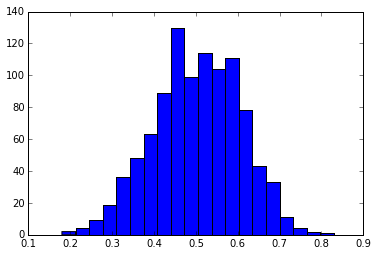

In [62]:
plt.hist(d["score"], bins=20);

### Llamada a un programa externo y captura del resultado en Python

In [44]:
%cd tmp
!tail -n +2 sampledata.csv > tmp.csv
cscore = !cscore tmp.csv
cscore = float(cscore[0])
print cscore

[Errno 2] No such file or directory: 'tmp'
/home/user/share/teaching/bioinformatics-scripting/teacher/tmp
0.50129


### Llamada a un programa externo dependiente de variables de entorno

In [47]:
%set_env NORMALIZATION=mult
!tail -n +2 sampledata.csv > tmp.csv
!head -1 sampledata.csv > tmp-mult.csv
!nscore tmp.csv >> tmp-mult.csv


env: NORMALIZATION=mult


In [48]:
!head tmp-mult.csv

id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,6.2
2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,2.2
3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.6333,41.4,39,3.3
4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,27,6.4
5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,5.0
6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,3.0
7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,3.3
8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,5.5
9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,90,5.0


### Carga y visualización en Python de datos resultantes programa externo

In [28]:
dm = pd.read_csv("tmp-mult.csv")
dm.iloc[:10]


,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,6.2
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,2.2
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,3.3
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,27,6.4
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,5.0
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,3.0
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,3.3
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,5.5
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,90,5.0
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17,4.1


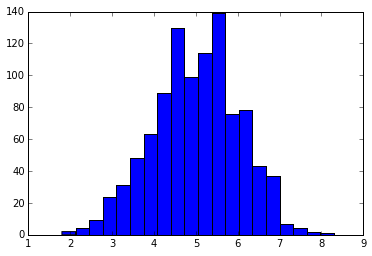

In [29]:
plt.hist(dm["score"], bins=20);

In [54]:
### Carga y visualización de datos en R

In [49]:
%R d = read.csv("sampledata.csv")

,id,first_name,last_name,email,country,ip_address,longitude,latitude,age,score
0,1,Sandra,Sims,ssims0@microsoft.com,Armenia,63.84.115.63,44.43054,40.14493,44,0.62
1,2,Anna,Bishop,abishop1@mtv.com,China,204.108.246.11,118.29169,29.67594,90,0.22
2,3,Virginia,Rodriguez,vrodriguez2@so-net.ne.jp,Portugal,88.65.157.43,-8.63330,41.40000,39,0.33
3,4,Julia,Stanley,jstanley3@abc.net.au,China,76.197.170.103,102.19379,38.50062,27,0.64
4,5,Jacqueline,Gutierrez,jgutierrez4@shinystat.com,Poland,159.13.71.38,18.54003,54.17062,14,0.50
5,6,Nicole,Little,nlittle5@latimes.com,Panama,235.246.1.116,-78.13774,8.40693,10,0.30
6,7,Terry,Fox,tfox6@squarespace.com,Iran,81.219.197.208,55.49164,37.38071,89,0.33
7,8,Jeremy,Parker,jparker7@gnu.org,China,17.207.110.163,110.71266,22.01041,60,0.55
8,9,Kenneth,Walker,kwalker8@nba.com,Slovenia,117.248.31.17,13.97028,45.68472,90,0.50
9,10,Willie,Brown,wbrown9@boston.com,Ethiopia,253.51.12.171,42.80000,9.35000,17,0.41


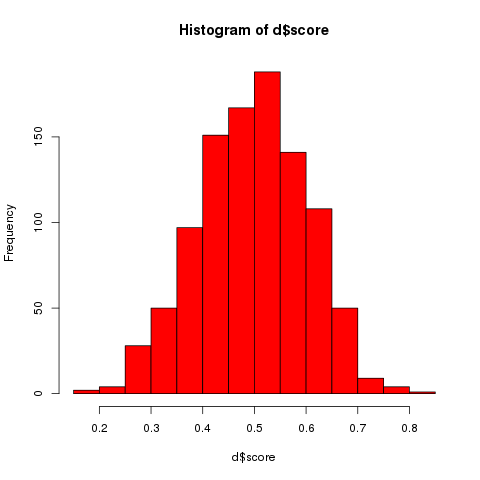

In [69]:
%R hist(d$score, breaks=10, col="red");

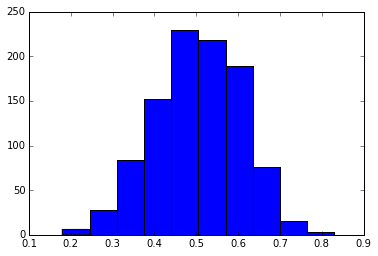

In [68]:
plt.hist(d["score"], bins=10);